# Закономерности, определяющие успех игры

* Задача данного исследования - разобраться, какие закономерности определяют успешность игры. Это нам потребуется для составления прогноза на 2017 год нашей рекламной компании. Для анализа был предоставлен датасет со всей необходимой информацией.
* План действий:
    * Получить датасет
    * Обработать данные и столбцы
    * Построить графики и получить информацию

<b>Шаг 1. Откроем файл с данными и изучим общую информацию<b>

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


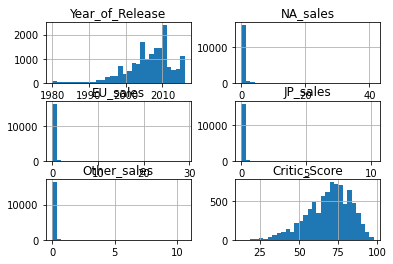

In [2]:
data = pd.read_csv('/datasets/games.csv')
original_data = data
data.info()
display(data.head(50))
data.hist(bins=30);

<b>Шаг 2. Подготовим данные<b>

Сразу приведем все названия столбцов к нижнему регистру.

In [3]:
data = data.rename(columns={c: c.lower() for c in data.columns})
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Год выхода игры необходимо привести к целочисленному типу, так как год не можеть нецелочисленным.

Оценку пользователей стоит сменить на тип float, так как в данном стобце присутствуют числа - рейтинг.

Остальные столбцы в изменении типа не нуждаются.

In [4]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.loc[data.user_score == 'tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Заполнить пропущенные значения в столбце name не получиться, так как никаким образом нельзя выявить пропущенные названия игр.

Заполнить год на основе других данных не удастаться.

Жанр игры на основе других данных заполнить не удастаться.

Оценки пользователей на основе других данных заполнить не удастаться.

Оценки критиков на основе других данных заполнить не удастаться..


Рейтинг можно попытаться заполнить по жанру игры, обычно, если жанр игры, к примеру, слэшер, то и для других игр жанра слэшер почти всегда будет одинаковым.



In [5]:
my_pivot = pd.pivot_table(data, index='rating', columns='genre', values='platform', aggfunc='count')
display(my_pivot)

def filling_rating(row):
    if row['rating'] == np.nan or pd.isnull(row['rating']) and not pd.isnull(row['genre']):
        return my_pivot[row['genre']].idxmax()
    return row['rating']


data['rating'] = data.apply(filling_rating, axis=1)
data.info()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
rating,,,,,,,,,,,,
AO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,416.0,162.0,8.0,457.0,358.0,289.0,585.0,84.0,48.0,325.0,1188.0,70.0
E10+,481.0,68.0,19.0,167.0,144.0,43.0,96.0,111.0,58.0,48.0,107.0,78.0
EC,1.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K-A,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
M,608.0,99.0,49.0,13.0,3.0,NaN,18.0,162.0,565.0,5.0,16.0,25.0
RP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0
T,681.0,115.0,362.0,239.0,64.0,10.0,172.0,420.0,348.0,190.0,198.0,162.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
display(original_data.query('User_Score.isna() and Critic_Score.isna() and Rating.isna()').shape)
display(original_data.query('User_Score.isna() and Critic_Score.isna() and Rating.isna()'))
display(original_data.query('User_Score.isna() and Critic_Score.isna() and Rating.isna() and Year_of_Release > 2010'))


(6621, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
83,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Скорее всего пропуски в данных могли появиться по причинам человеческой ошибки или механической ошибки. Можно заметить, что если информация отсутствует в столбце оценка пользователя, то она также отсутствует и в столбце оценка критиков и в столбце рейтинга игры. Если речь про популярные игры, например Super Mario Bros., где продажи составляют огромное количество, то там скорее всего игра просто не была оценена, так как на то время просто не существовало сервисом для оценки игр с их детальной информацией по типу возрастного рейтинга. А если речь про игры, к примеру LMA Manager 2007, где продажи чуть выше 0, можно предположить что никто из пользователей просто не оставил отзыв игре. Также можно заметить, что чем новее игра, тем меньше пропусков в этих 3 столбцах она имеет, значит можно предположить, что более старые игры не лежали на сервисах, где пользователи и критики могли бы ставить оценки игре. Если же речь про столбец genre, где всего 2 пропуска, то тут можно предположить, что игра не имеет какого-то 1 жанра или разработчик игры просто не указал его при выпуске.

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


<b>Шаг 3. Проведем исследовательский анализ данных<b>

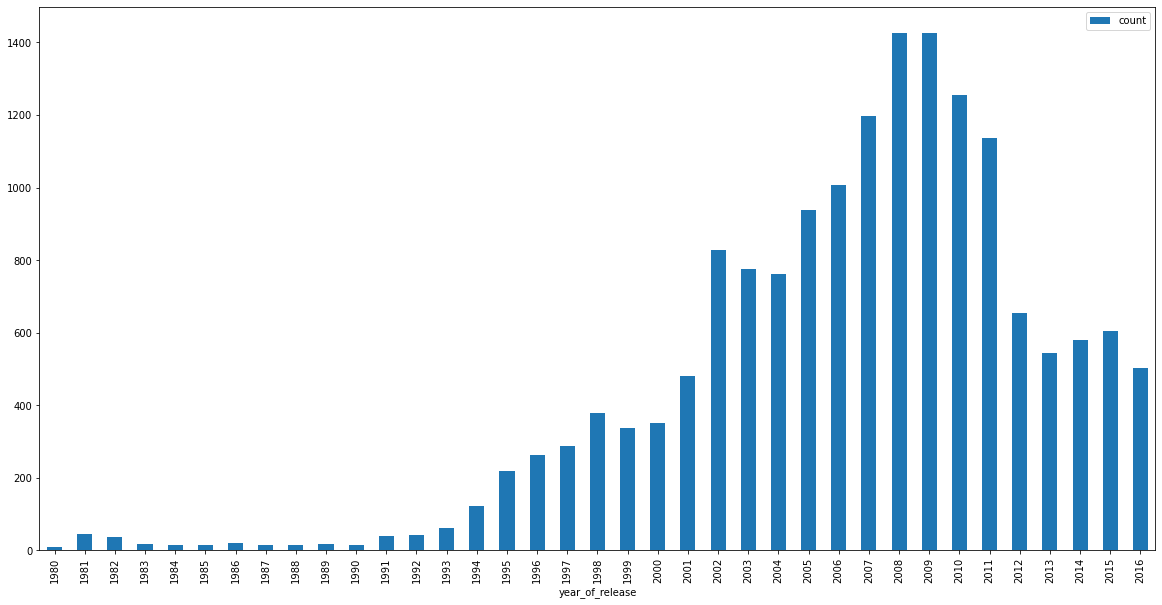

In [8]:
data.pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', label='count',
                                                                                   figsize=(20, 10));
plt.legend(['count']);

Больше всего игр выпускалось в 2008-2009 годах.

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
Name: total_sales, dtype: float64

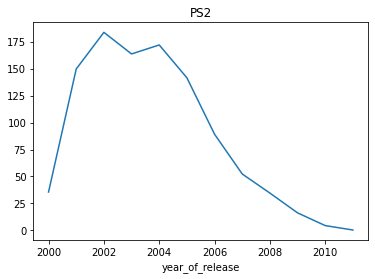

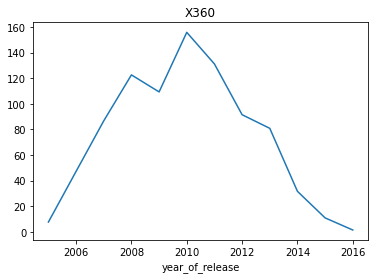

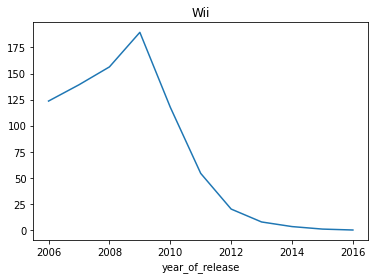

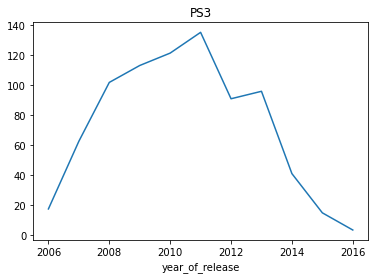

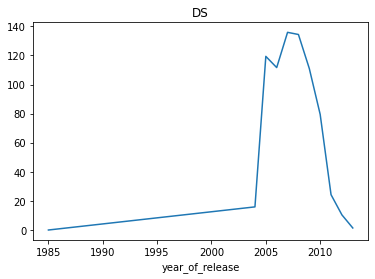

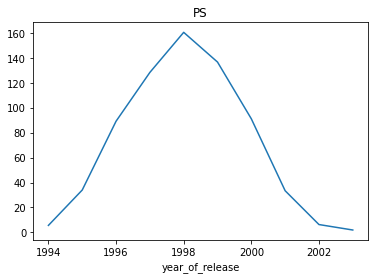

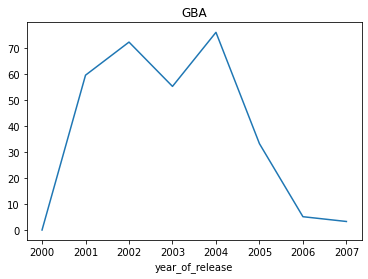

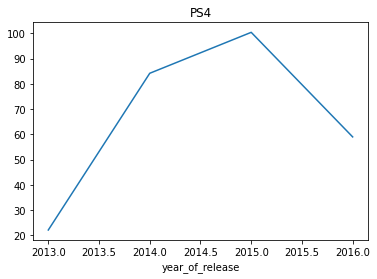

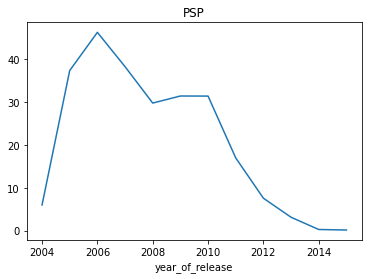

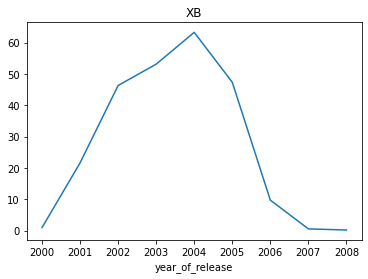

In [9]:
platform_top_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
display(platform_top_sales)
# platform_top_sales.plot();
# platform_top_sales.plot(kind='bar', figsize=(20, 10));

for platform in platform_top_sales.index:
    temp = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(title=platform);
    plt.show()

По данному топ-10 платформ можно заметить, что в среднем время жизни платформы - около 10 лет.

In [10]:
data = data.query('2013 <= year_of_release <= 2016', engine='python')
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


Поскольку в среднем длительность жизни платформы 10 лет - значит, нас не интересуют платформы, чей десяток лет уже подходит к концу, поэтому будем брать данные от 2013 до 2016 года, где платформы на своем пике или зародились будущие фавориты.

platform
PS4     265.79
PS3     154.66
XOne    145.05
3DS     136.97
X360    124.69
WiiU     59.94
PC       36.47
PSV      29.73
Wii      12.54
PSP       3.46
DS        1.42
Name: total_sales, dtype: float64

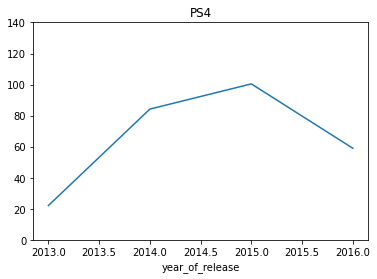

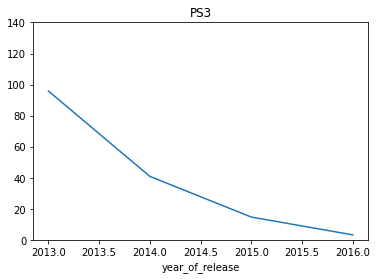

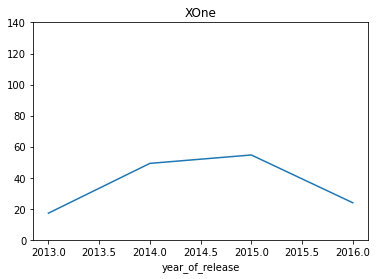

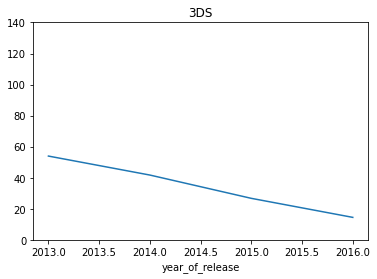

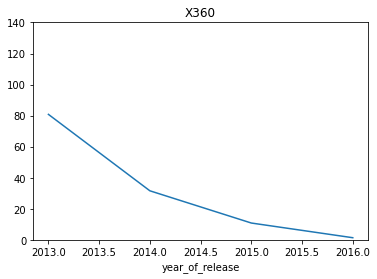

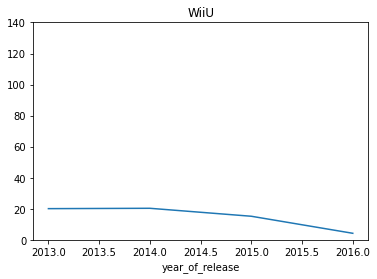

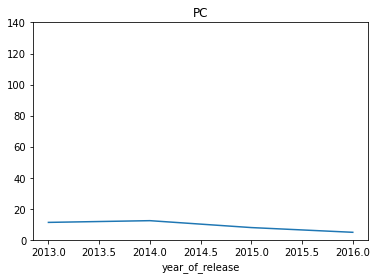

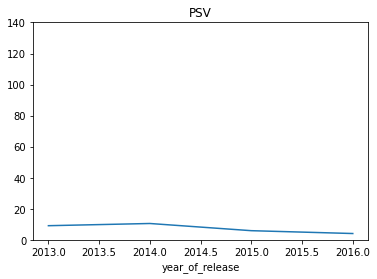

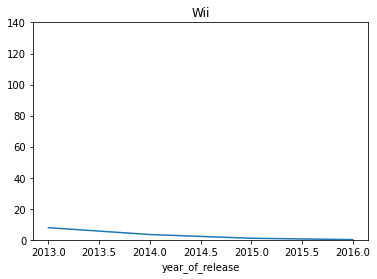

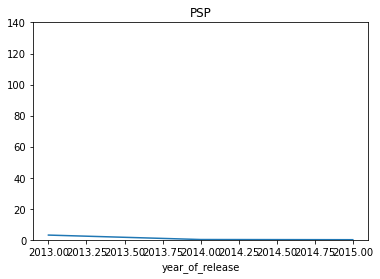

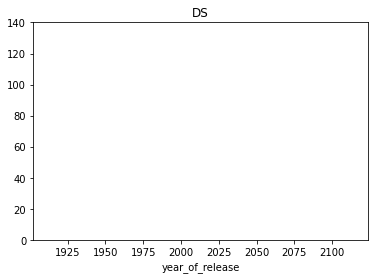

In [11]:
actual_period_df = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(actual_period_df)

for platform in actual_period_df.index:
    temp = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(title=platform,
                                                                                                   ylim=(0, 140));
    plt.show()

Очевидные лидеры продаж с 2011 по 2016 - PS3, X360, PS4, 3DS, XOne. Однако PS3 и X360 - умершие платформы, так как на момент 2016 года продажи около 0, а вот PS4 и XOne - в 2015 были на своем пике. 3DS движется к своему концу.

Потенциально прибыльными будем считать новое поколение консолей - PS4, XOne.

PS4


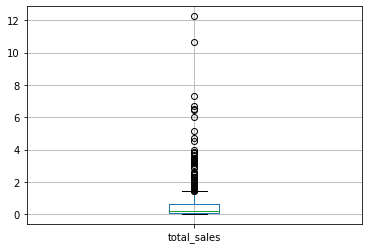

PS3


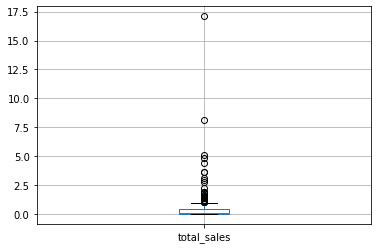

XOne


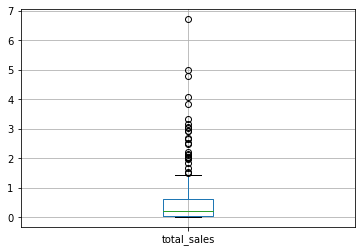

3DS


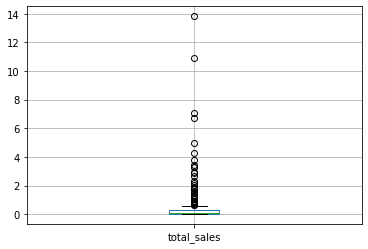

X360


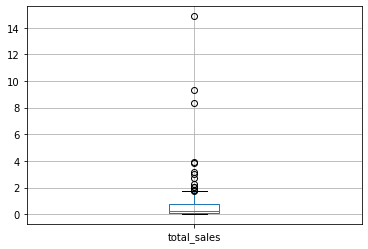

WiiU


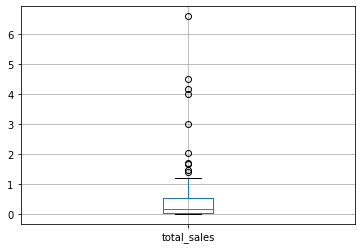

PC


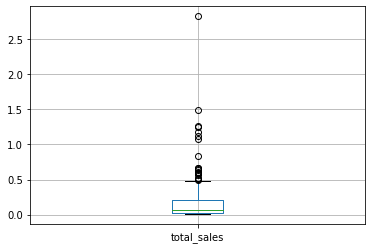

PSV


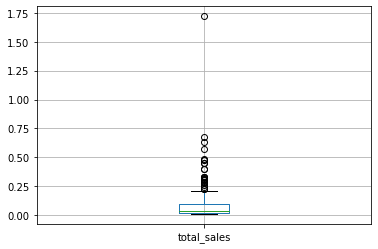

Wii


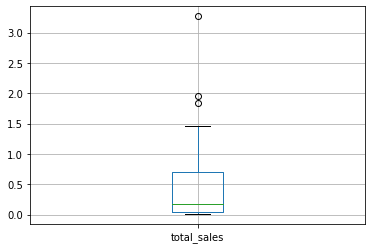

PSP


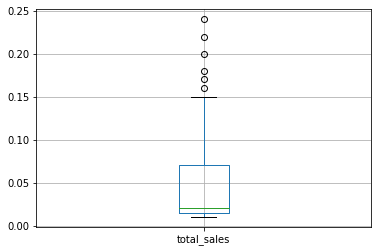

DS


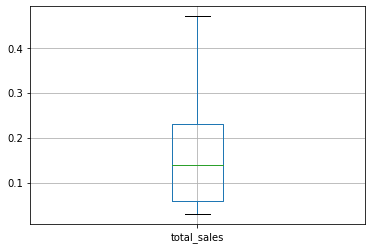

In [12]:
for platform in actual_period_df.index:
    print(platform)
    temp = data.query('platform == @platform').boxplot('total_sales');
    # data.query('platform == @platform')['total_sales'].hist(bins=100)
    plt.show()
# data.boxplot('total_sales');

Если рассматривать лидеров-платформы, да и вообще все платформы в целом, можно заметить, что большинство значений лежат в пределах 1млн копи, а то и меньше, лишь немногим разработчикам удается продать свою игру больше чем на 2млн копий, а еще меньше - больше чем 5 млн. Чем больше продаж, тем меньше таких игр выпускалось когда-либо за период 2011-2016.

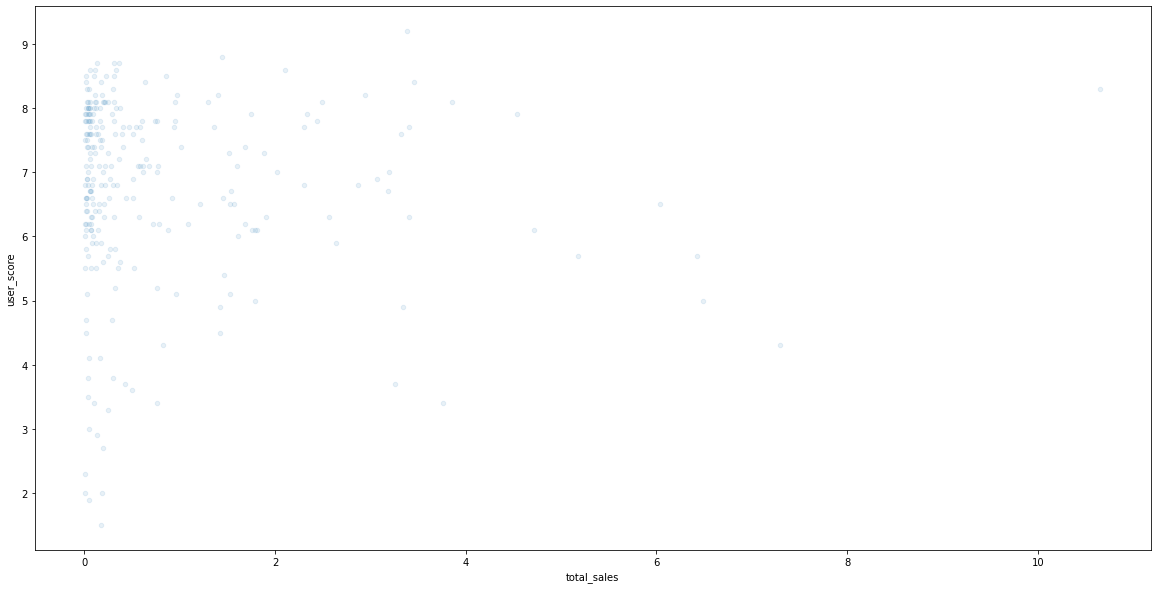

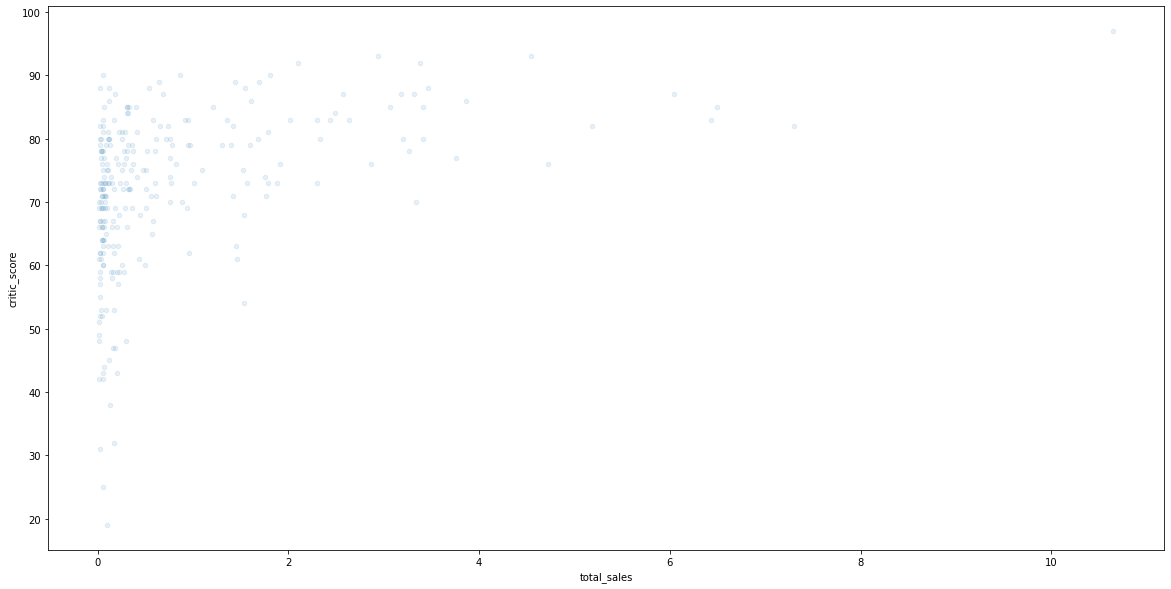

In [13]:
data.query('platform == "PS4"').plot(kind='scatter', x='total_sales', y='user_score', figsize=(20, 10), alpha=0.1);
# plt.xlim(0, 4);
plt.show()

data.query('platform == "PS4"').plot(kind='scatter', x='total_sales', y='critic_score', figsize=(20, 10), alpha=0.1);

# data[[data['platform'] == 'PS']['total_sales']].plot()


По данным диаграммам размаха нельзя сказать, что оценки пользователей как-то влияют на продажи. Нельзя найти четкую зависимость, что чем выше отзывы - тем больше продажи. Если же смотреть на диаграмму размаха с оценками критиков, то в целом можно сказать, что есть какое-то более четкое течение, намного больше высоких отзывов у игр с высокими продажами в сравнении с предыдущей диаграммой размаха, однако все равно никакой четкой зависимости найти нельзя.

In [14]:
print('Корреляция между оценкой пользователей и общими продажами: \n',
      data.query('platform == "PS4"')['user_score'].corr(data['total_sales']))
print('Корреляция между оценкой критиков и общими продажами: \n',
      data.query('platform == "PS4"')['critic_score'].corr(data['total_sales']))


Корреляция между оценкой пользователей и общими продажами: 
 -0.03126053686666919
Корреляция между оценкой критиков и общими продажами: 
 0.4058867746520127


Теперь соотнесём наши небольшие выводы на других платформах

Платформа: PS3


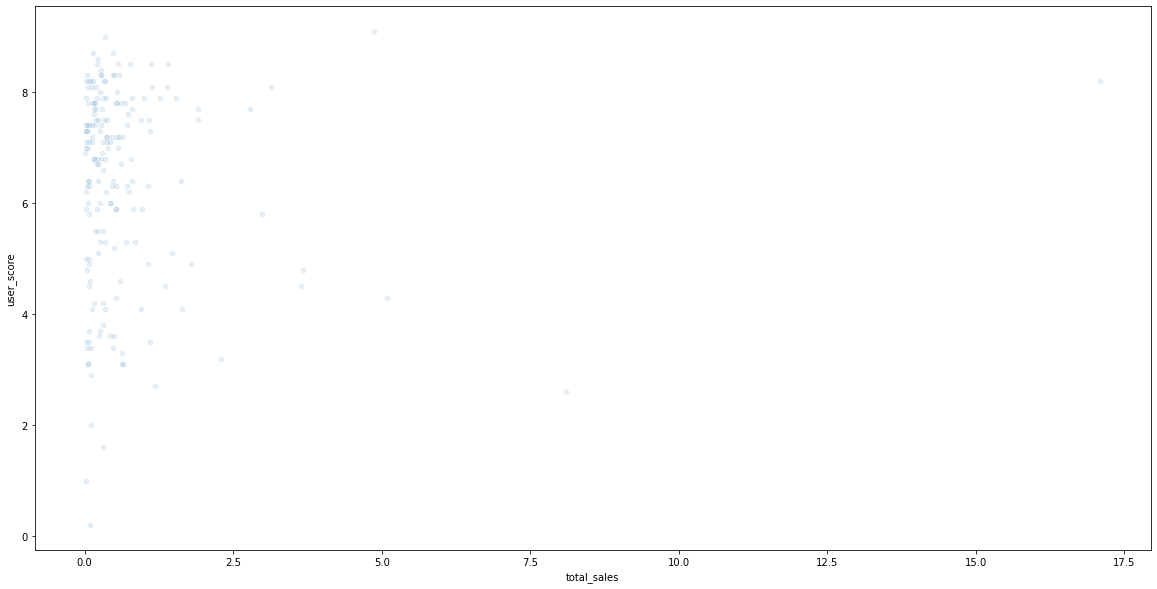

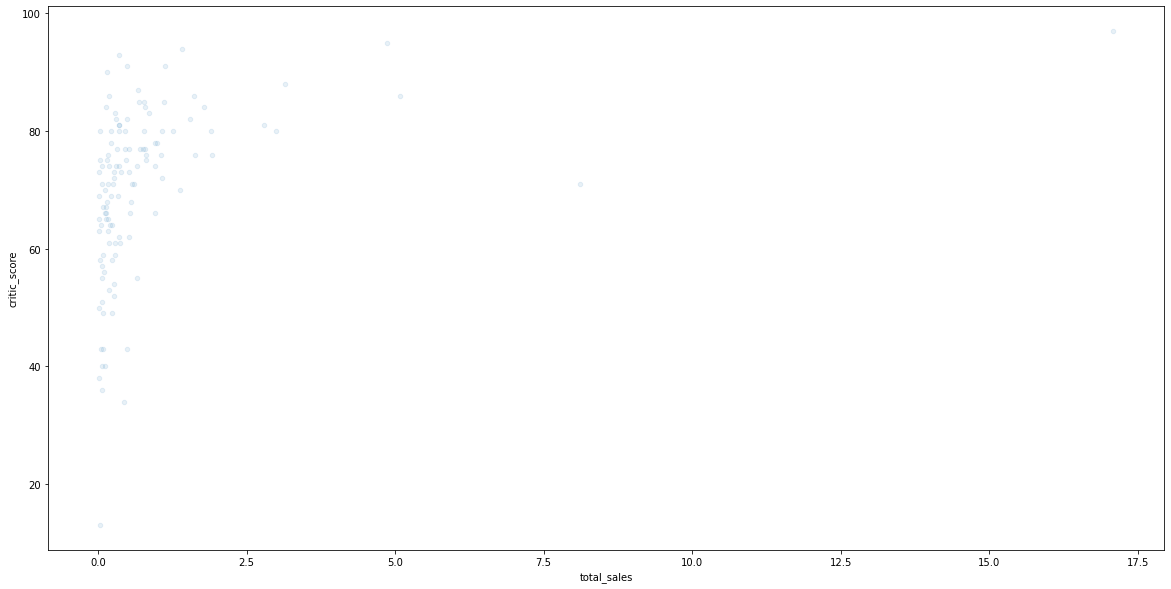

Корреляция между оценкой пользователей и общими продажами на плафтформе PS3: 
 0.0018991561369883425
Корреляция между оценкой критиков и общими продажами на платформе PS3: 
 0.3375139894933373


Платформа: XOne


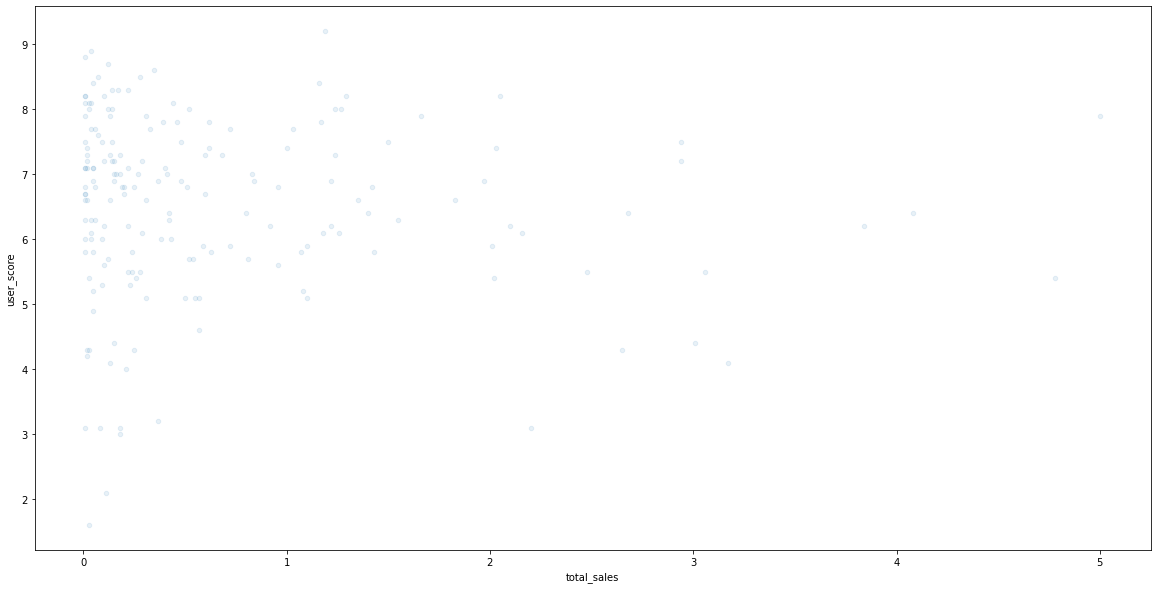

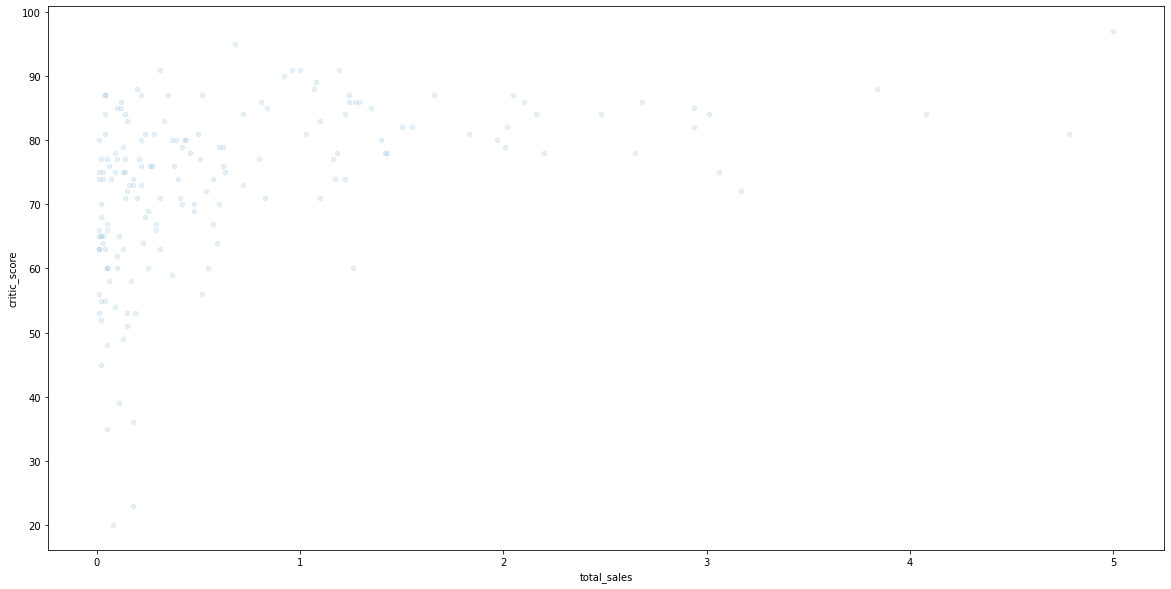

Корреляция между оценкой пользователей и общими продажами на плафтформе XOne: 
 -0.06880394425598692
Корреляция между оценкой критиков и общими продажами на платформе XOne: 
 0.41720638309101765


Платформа: 3DS


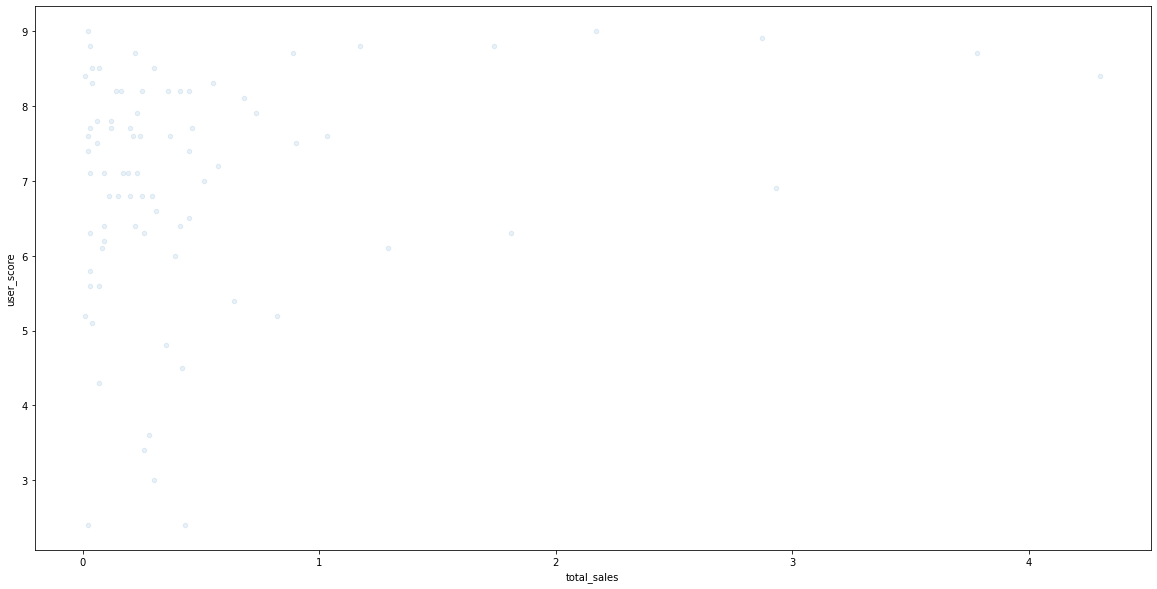

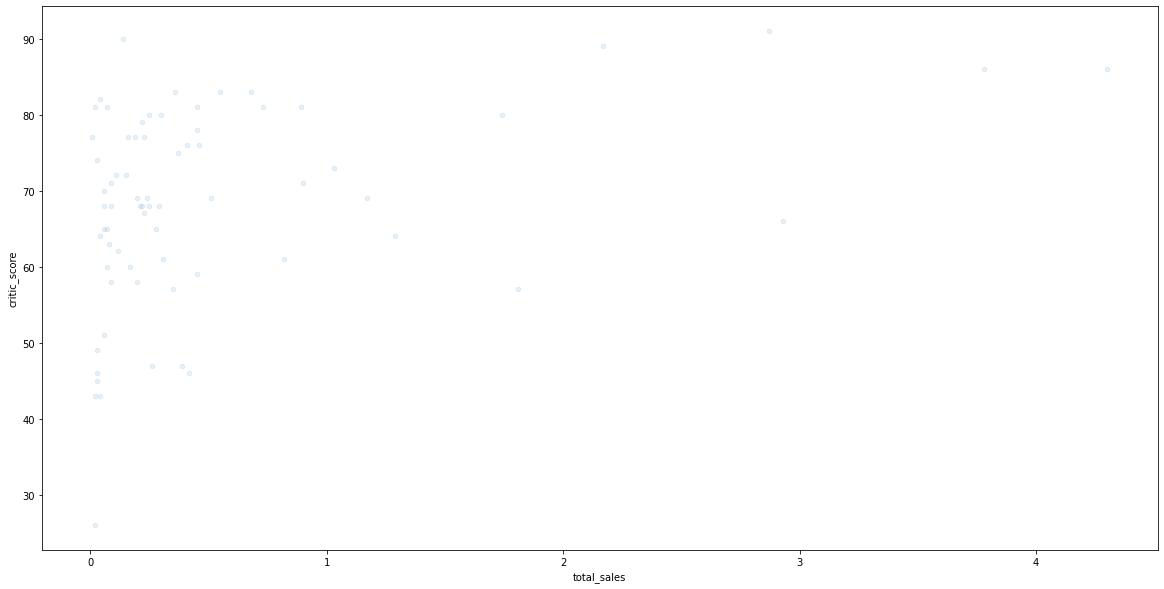

Корреляция между оценкой пользователей и общими продажами на плафтформе 3DS: 
 0.24241374755747724
Корреляция между оценкой критиков и общими продажами на платформе 3DS: 
 0.35569676317079335


Платформа: X360


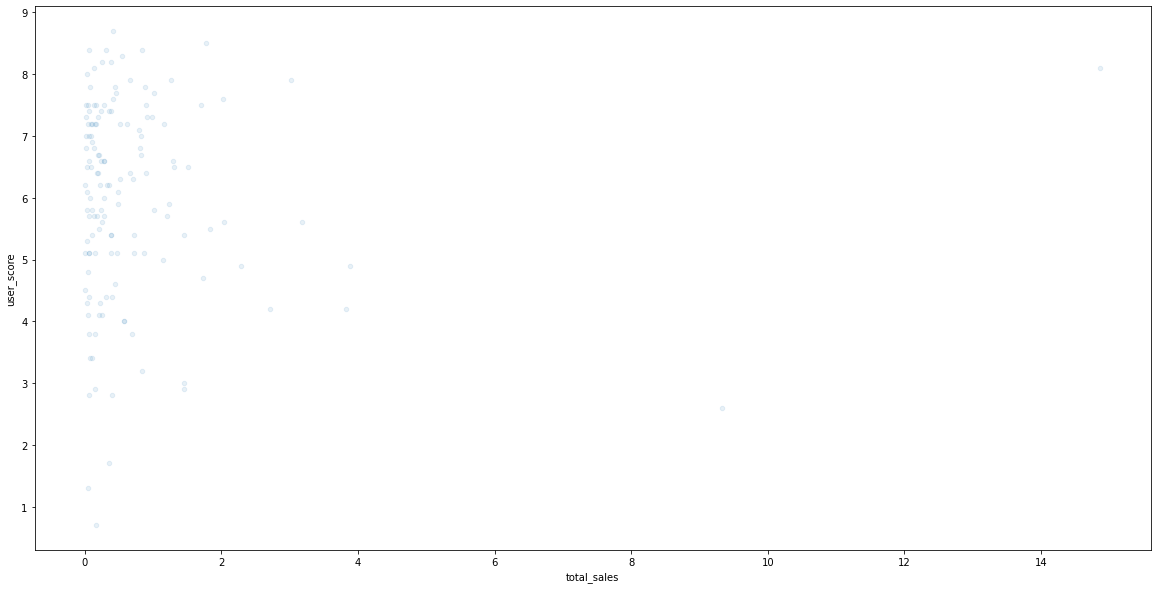

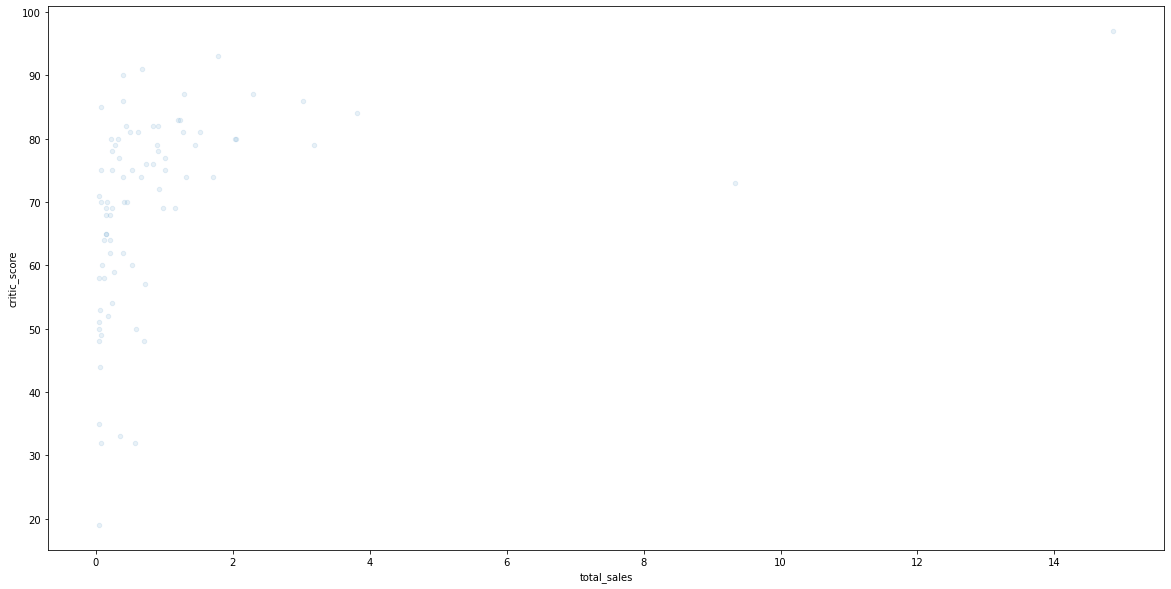

Корреляция между оценкой пользователей и общими продажами на плафтформе X360: 
 -0.011054391072611235
Корреляция между оценкой критиков и общими продажами на платформе X360: 
 0.3504305787216835


Платформа: WiiU


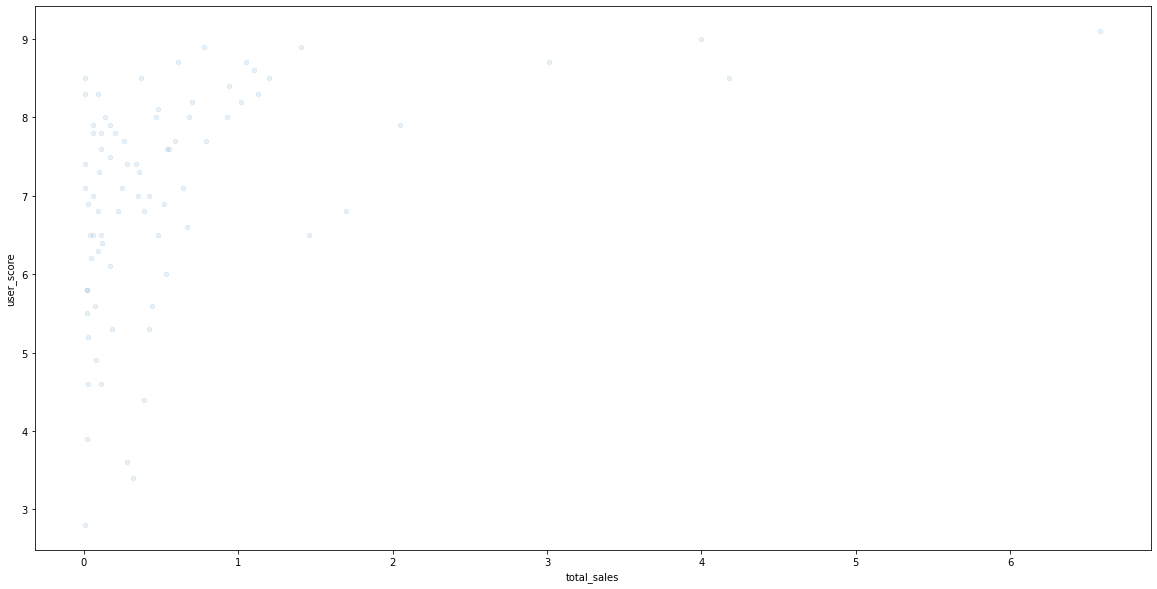

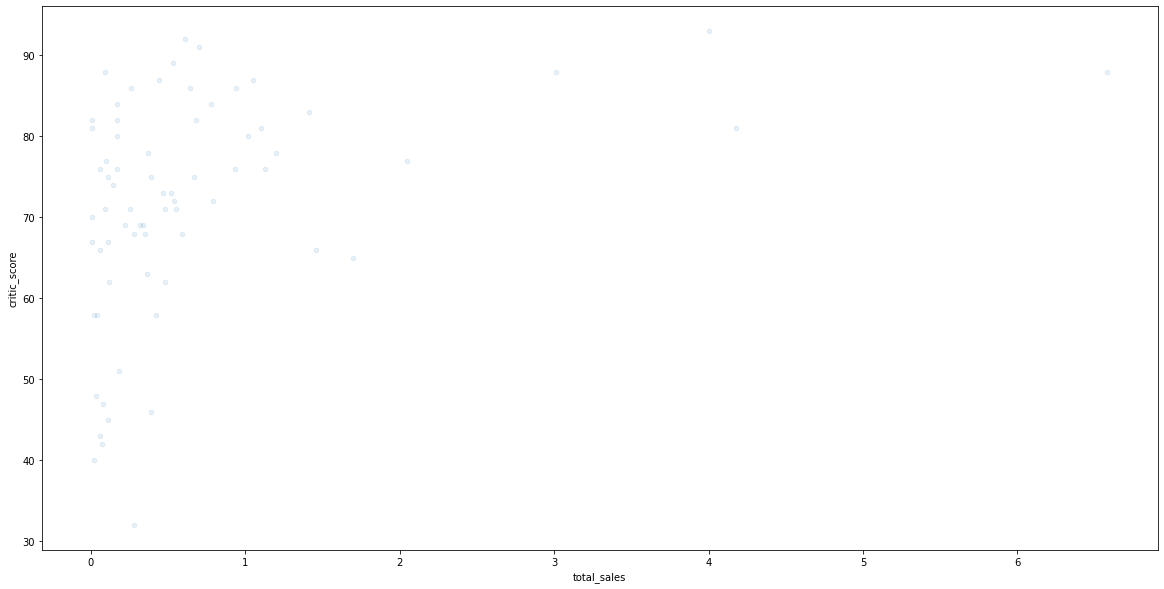

Корреляция между оценкой пользователей и общими продажами на плафтформе WiiU: 
 0.4181985567525382
Корреляция между оценкой критиков и общими продажами на платформе WiiU: 
 0.3745905320498915


Платформа: PC


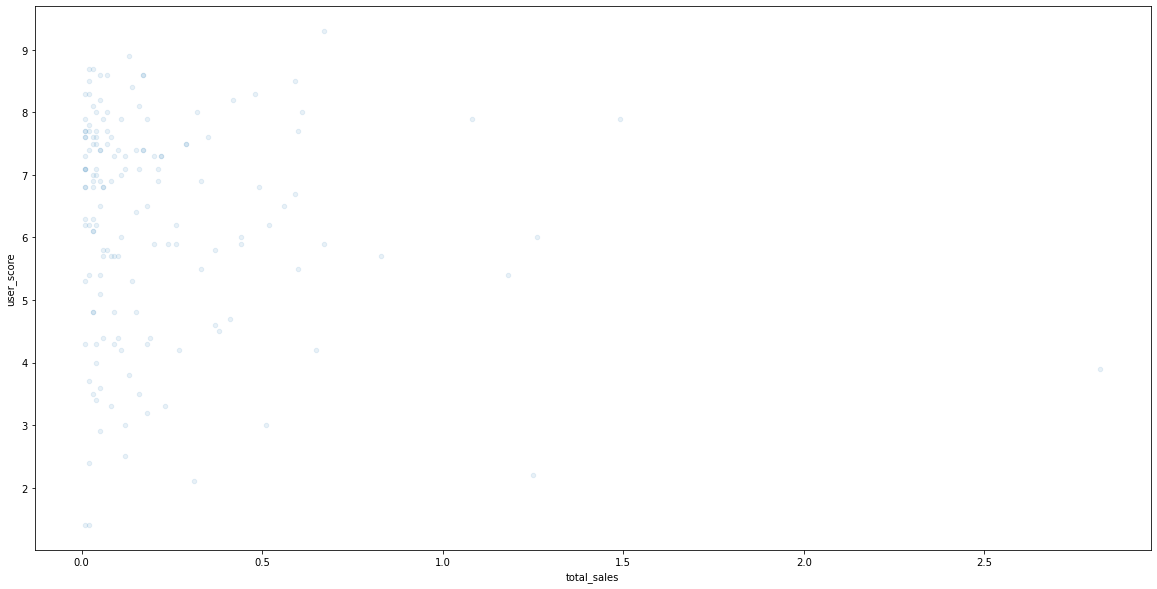

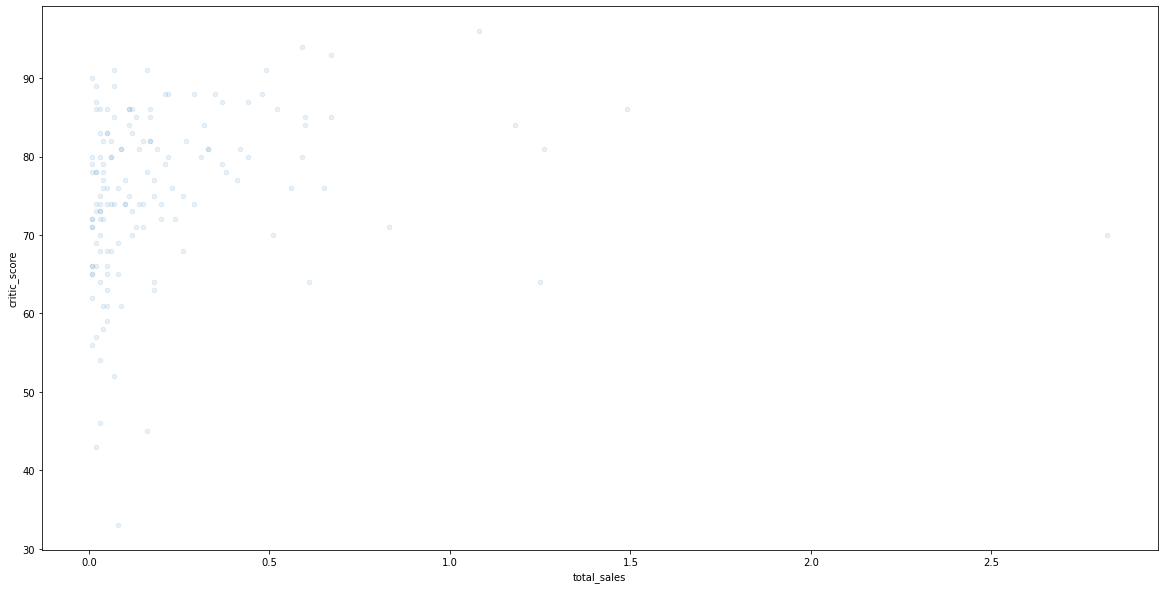

Корреляция между оценкой пользователей и общими продажами на плафтформе PC: 
 -0.09175209083674118
Корреляция между оценкой критиков и общими продажами на платформе PC: 
 0.19693097479003824


Платформа: PSV


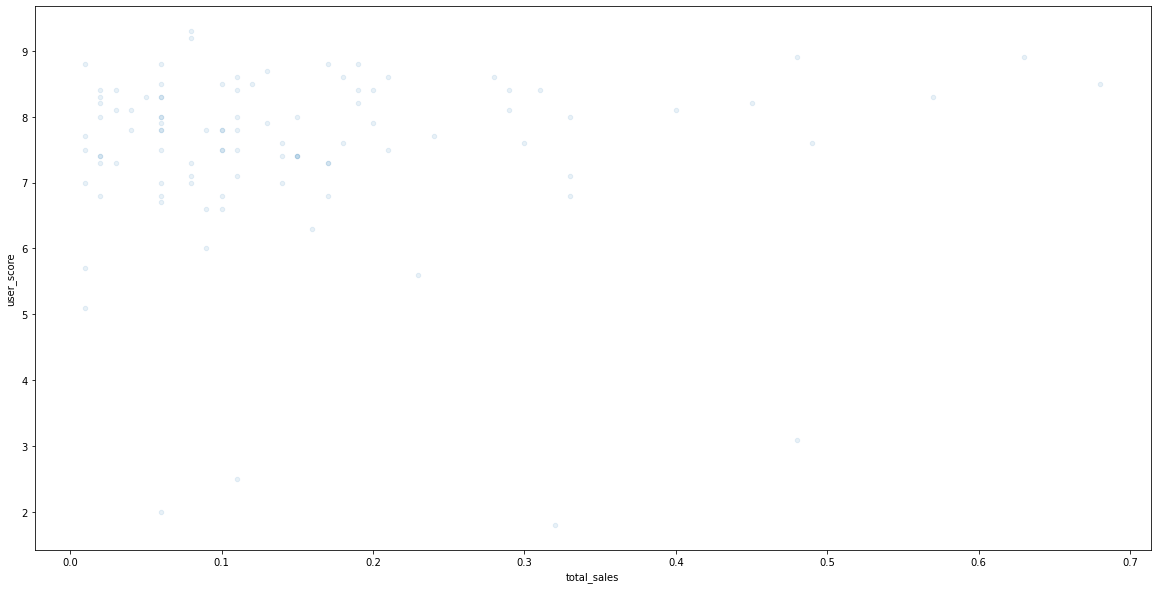

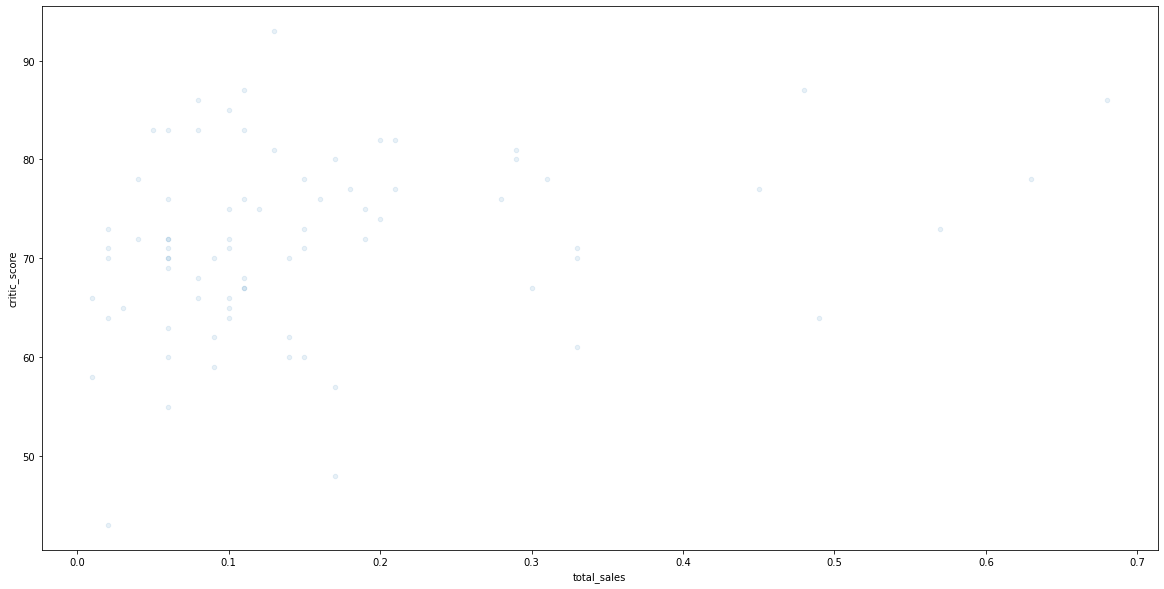

Корреляция между оценкой пользователей и общими продажами на плафтформе PSV: 
 0.029893995486960145
Корреляция между оценкой критиков и общими продажами на платформе PSV: 
 0.26021644071736705


Платформа: Wii


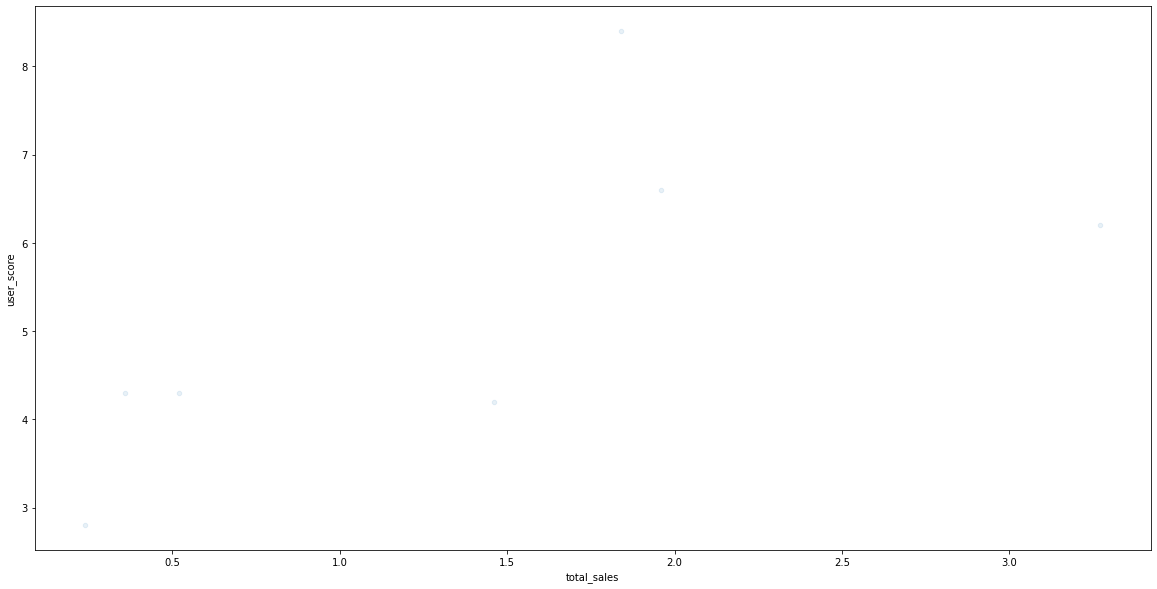

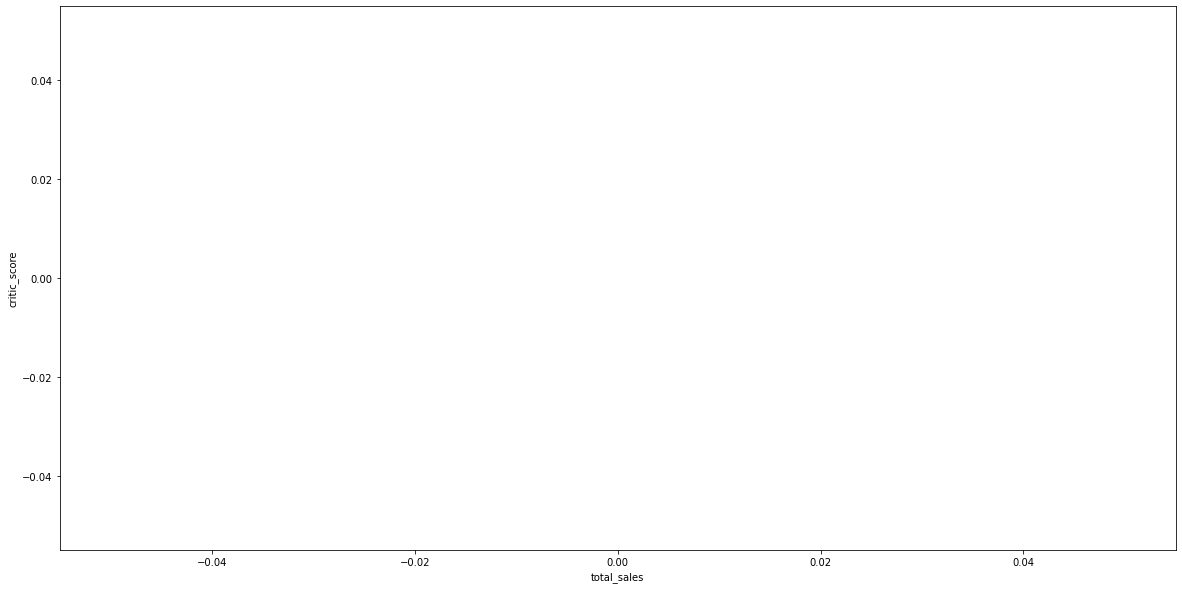

Корреляция между оценкой пользователей и общими продажами на плафтформе Wii: 
 0.6837940824450394
Корреляция между оценкой критиков и общими продажами на платформе Wii: 
 nan


Платформа: PSP


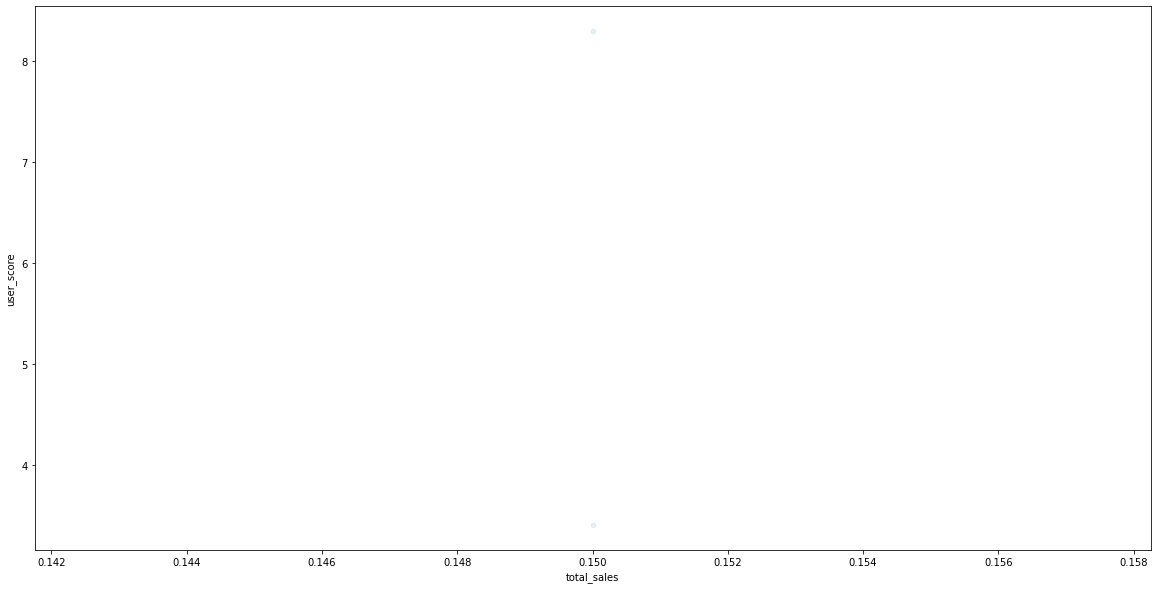

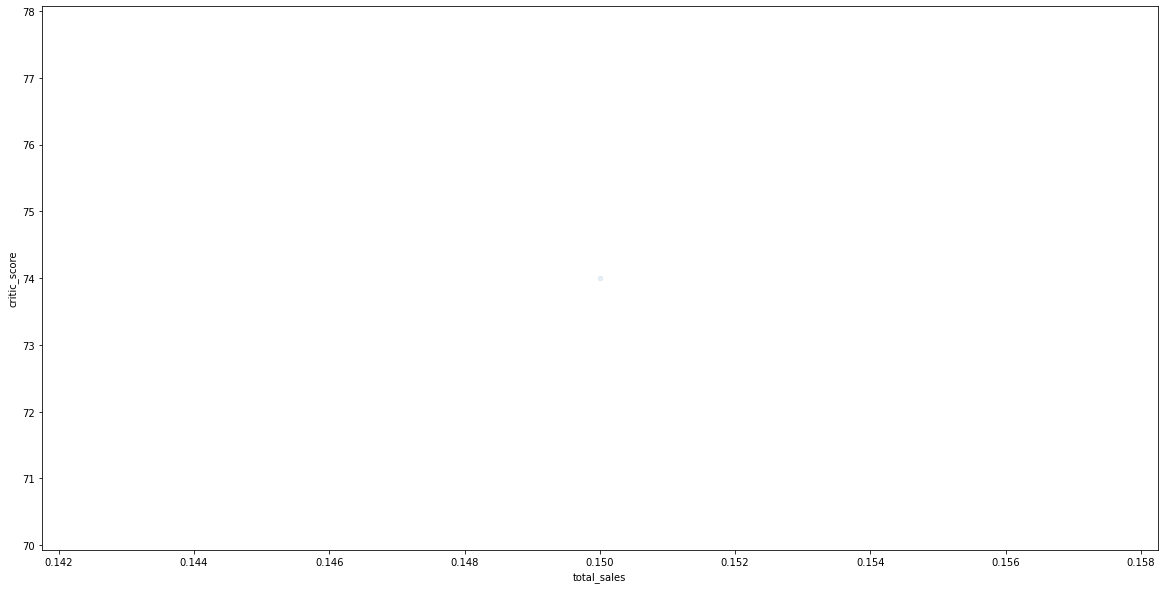

Корреляция между оценкой пользователей и общими продажами на плафтформе PSP: 
 nan
Корреляция между оценкой критиков и общими продажами на платформе PSP: 
 nan


Платформа: DS


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


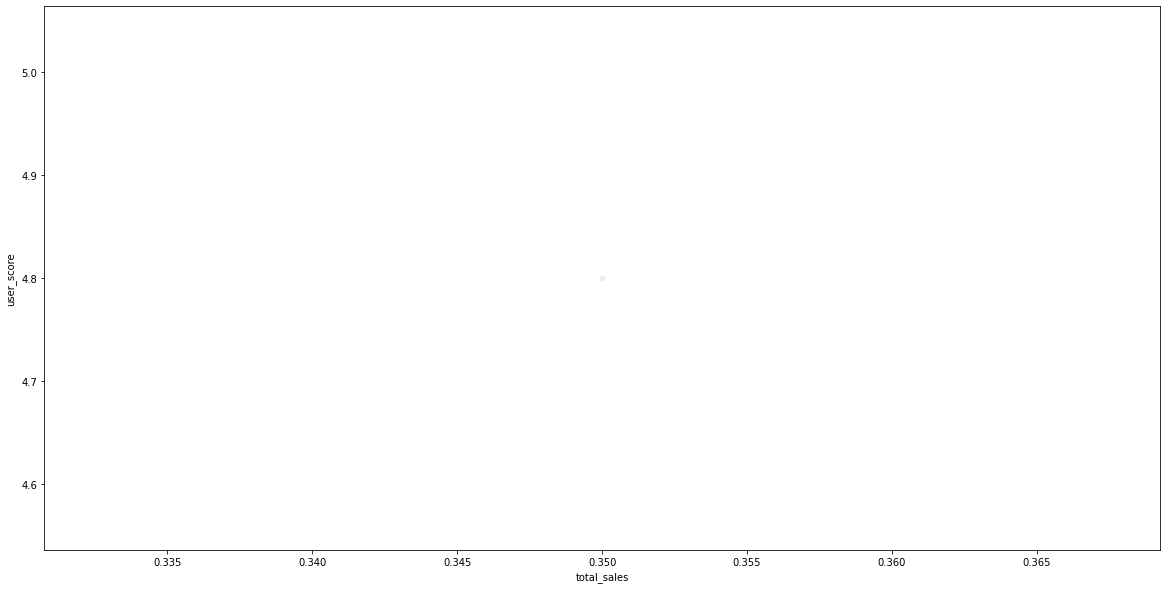

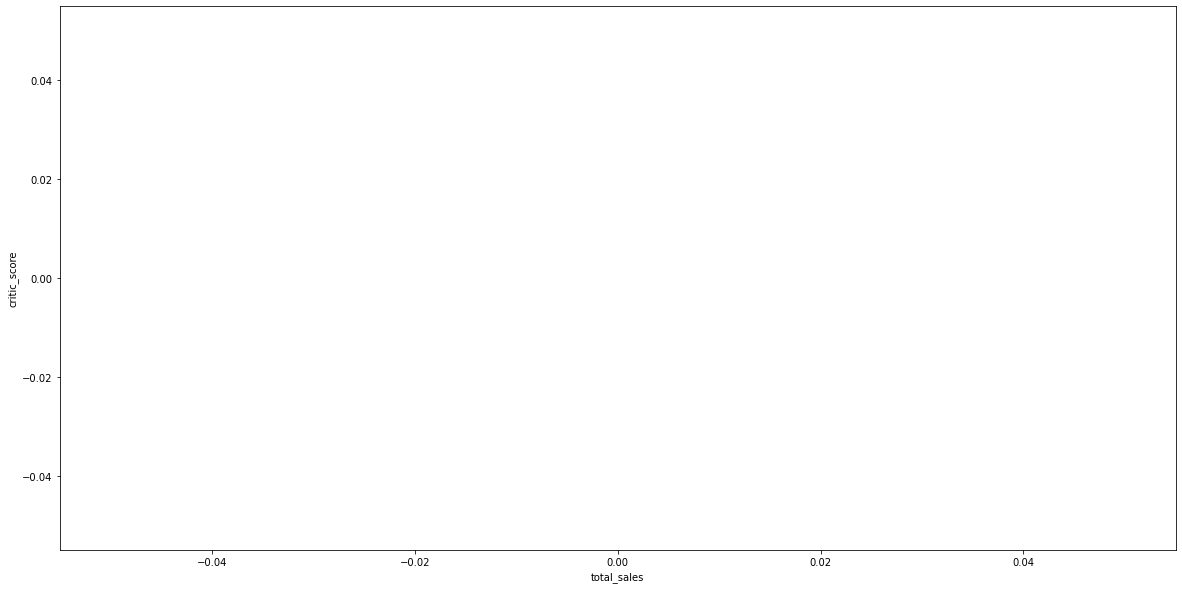

Корреляция между оценкой пользователей и общими продажами на плафтформе DS: 
 nan
Корреляция между оценкой критиков и общими продажами на платформе DS: 
 nan




In [15]:
for platform in actual_period_df.index:
    if platform != "PS4":
        print("Платформа:", platform)
        data.query('platform == @platform').plot(kind='scatter', x='total_sales', y='user_score', figsize=(20, 10), alpha=0.1);
        plt.show()

        data.query('platform == @platform').plot(kind='scatter', x='total_sales', y='critic_score', figsize=(20, 10), alpha=0.1);
        plt.show()
        print(f'Корреляция между оценкой пользователей и общими продажами на плафтформе {platform}: \n',
        data.query('platform == @platform')['user_score'].corr(data['total_sales']))
        print(f'Корреляция между оценкой критиков и общими продажами на платформе {platform}: \n',
        data.query('platform == @platform')['critic_score'].corr(data['total_sales']))
        print()
        print()



Как и в случае первичных выводов на платформе PS4 - никакие оценки не влияют на количество продаж.

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

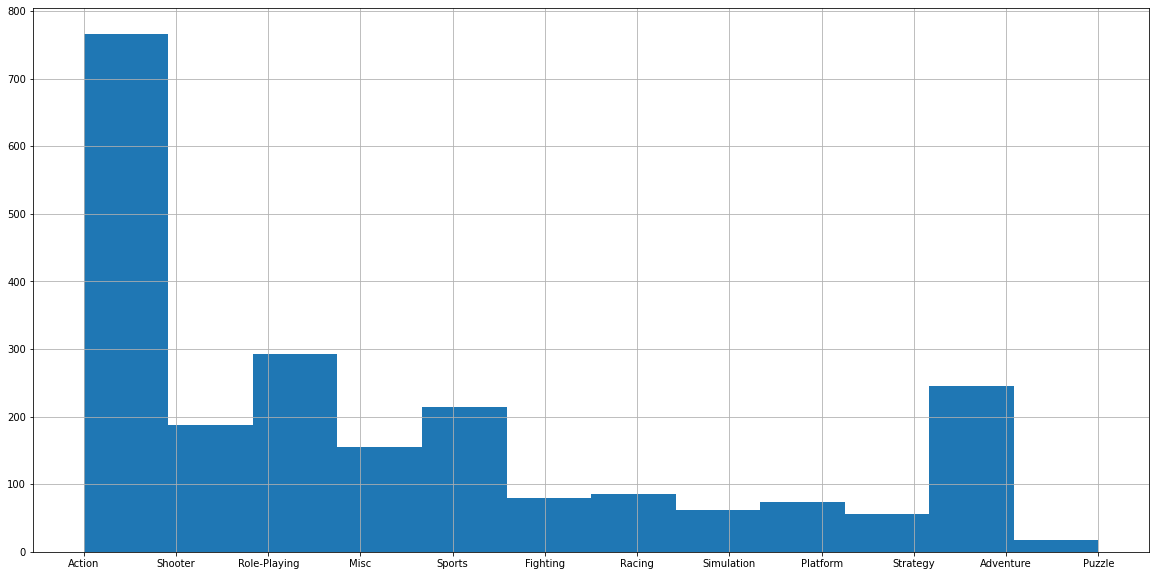

In [16]:
data['genre'].hist(figsize=(20, 10), bins=len(data['genre'].unique()));
count_of_genres = data.groupby('genre')['genre'].count().sort_values(ascending=False)
display(count_of_genres)

Самый популярный жанр - Экшн. Этим все сказано.

genre
Action          284.67
Shooter         204.21
Role-Playing    134.41
Sports          131.20
Misc             56.73
Platform         38.51
Racing           35.45
Fighting         31.75
Adventure        21.21
Simulation       20.30
Strategy          9.27
Puzzle            3.01
Name: total_sales, dtype: float64

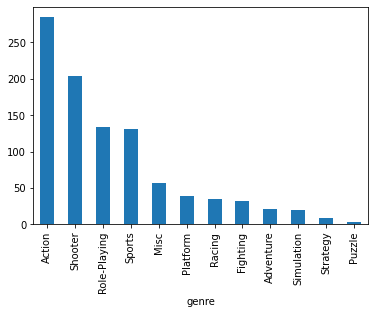

In [17]:
genre_top_sales = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
display(genre_top_sales)
genre_top_sales.plot(kind='bar');

Он же является и самым продаваемым, также те жанры, которые были популярны - Шутеры, Спорт, Миск - также находятся в топе по продажам. А вот жанр приключения - почти внизу списка, хоть и является популярным жанром.

In [18]:
count_of_genres = data.groupby('genre')['genre'].count().sort_values(ascending=False)
display(count_of_genres)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [19]:
# my_iter = iter(count_of_genres.index)
# for i in range(len(count_of_genres.index)):
#     print(f'Соотношение количества игр {count_of_genres[i]} жанра {next(my_iter)} на их общую продажу {genre_top_sales[i]}', count_of_genres[i] / genre_top_sales[i])

<b>Шаг 4. Составим портрет пользователя каждого региона<b>

In [20]:
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 293.5+ KB


In [21]:
def portrait_of_the_user_of_region(region):
    print("Портрет для региона", region[0:2].upper())
    most_popular_platform = data.groupby('platform')[region].sum().sort_values(ascending=False)
    total_sales = most_popular_platform.sum()
    most_popular_platform = most_popular_platform.head()
    most_popular_platform_sales = most_popular_platform.sum()
    most_popular_platform['other'] = total_sales - most_popular_platform_sales
    # display(most_popular_platform)
    print("Доля продаж:")
    most_popular_platform.plot(kind='pie', autopct='%1.1f%%');
    plt.show()
    share_of_sales = most_popular_platform / total_sales
    print()
    print()
    print(f"Самые популярные жанры региона {region[0:2].upper()}")
    data.groupby('genre')[region].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%');
    plt.show()
    print("Самые продаваемые рейтинги игры региона", region[0:2].upper())
    data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie');
    plt.show()



Портрет для региона NA
Доля продаж:


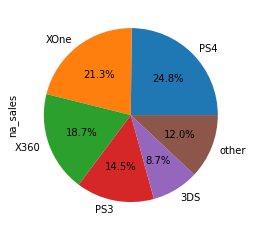



Самые популярные жанры региона NA


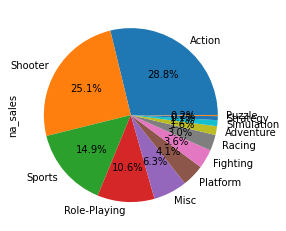

Самые продаваемые рейтинги игры региона NA


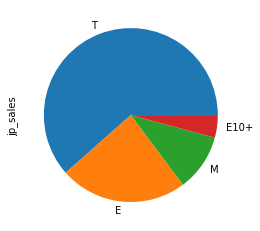

Портрет для региона EU
Доля продаж:


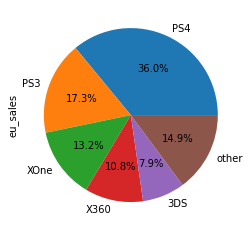



Самые популярные жанры региона EU


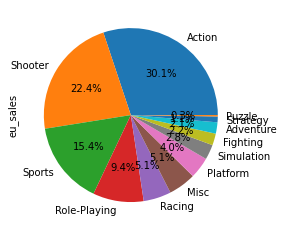

Самые продаваемые рейтинги игры региона EU


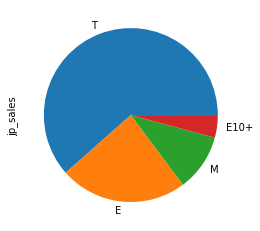

Портрет для региона JP
Доля продаж:


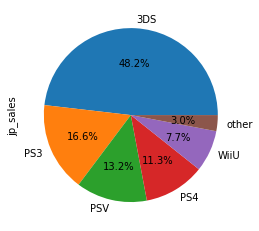



Самые популярные жанры региона JP


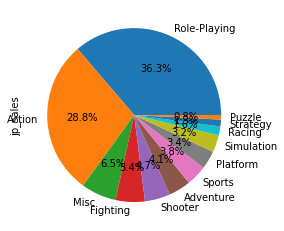

Самые продаваемые рейтинги игры региона JP


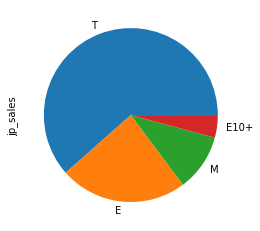

In [22]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
regions = iter(regions)

portrait_of_the_user_of_region(next(regions))
portrait_of_the_user_of_region(next(regions))
portrait_of_the_user_of_region(next(regions))





<b>Теперь подытожим сведения о наших портретах:<b>

Самая популярная платформа среди пользователей North America - X360, ей в спину дышит PS3, а уже после новые платформы PS4 и XOne. Самые популярные жанры у пользователей NA - Экшен и Шутеры. Превосходят по продажам игры с рейтингом T. Как итог - подростки этого региона предпочитают динамичные игры.

Самая популярная платформа среди пользователей EU - PS3, за ней сразу же идет её потомок - PS4, а уже за ней серия приставок X360 и XOne. В данном регионе также два самых популярных жанра - Экшен и Шутеры и их также предпочитают подростки(самый продаваемый рейтинг игр - T)

А вот с регионом JP все немного иначе: самые продаваемые игры вышли на портативной приставке - 3DS, а уже потом идет PS3. Шутеры в данном регионе игроки не предпочитают, возможно, в регионе JP с этим все намного строже и шутерам трудно получить рейтинг T - он же самый популярный в JP. Там предпочитают играть в Ролевые игры и Экшен.


<b>Шаг 5. Проверим гипотезы<b>


Нулевая гипотеза: среднее пользовательских рейтингов платформ XOne и PS4 двух генеральных совокупностей равны.
Альтернативная гипотеза: среднее пользовательских рейтингов платформ XOne и PS4 двух генеральных совокупностей НЕ равны.

In [23]:
data_tmp = data[data['user_score'].notnull()]

alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_tmp.loc[data_tmp['platform'] == 'XOne', 'user_score'],
    data_tmp.loc[data_tmp['platform'] == 'PC', 'user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: среднее пользовательских рейтингов жанров Action и Sports двух генеральных совокупностей равны.
Альтернативная гипотеза: среднее пользовательских рейтингов жанров Action и Sports двух генеральных совокупностей НЕ равны.

In [24]:
results = st.ttest_ind(
    data_tmp.loc[data_tmp['genre'] == 'Action', 'user_score'],
    data_tmp.loc[data_tmp['genre'] == 'Sports', 'user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


<b>Шаг 6. Напишем общий вывод<b>

Был проведён большой анализ датафрейма. Были переименованы названия столбцов, данные преобразованы в нужные типы данных, при возможности были заполнены пропуски медианными значениями по другим критериям или максимально часто попадающимися. Были описаны возможные причины появления пропусков. Были построены графики, гистограммы, диаграммы размаха для различных значений, к примеру посмотреть на распределение количества выхода игр по годам. Проанализировав продажи по платформам, за актуальный период был выбран 2011 - 2016 год, то бишь 5 лет. Именно за этот срок платформы либо умирали, либо находились на своем пике. Был составлен портрет пользователя каждого из трёх регионов, а также проверены гипотезы о среднем двух генеральных совокупностей. Таким образом проведя большой анализ можно сказать, что, прогноз на 2017 год - будет очень много игр на PS4 и XOne в жанре экшен и шутер, именно они будут самыми прибыльными и лидирующими с рейтингом T.